In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading cleaner data
from env import user, password, host
import os

In [1156]:
# # df = pd.read_clipboard()
# # df.to_csv("anomalous_curriculum.csv")
# df = pd.read_csv("anomalous_curriculum.csv")

In [1157]:
# df.head()

In [1158]:
# df.columns

In [1159]:
# del df['Unnamed: 0']
# df = df.rename(columns={"2018-01-26" : 'date', "09:55:03": "time", "/":"file_location", '1': "user_id", "8":"cohort_id", "97.105.19.61":"ip_address"})

In [1160]:
# df.columns

In [1161]:
# df.info()

In [1162]:
# df['date_time'] = df.date + " " + df.time

In [1163]:
# df.head()

In [1164]:
# df['date_time'] = pd.to_datetime(df.date_time)
# df.info()

In [1165]:
# df[df.ip_address == "22"]

In [1166]:
# del df['date']
# del df['time']
# df.head()

In [1167]:
# df[df.ip_address == "22"]

In [1168]:
# df[df.file_location == "java-ii/object-oriented-programming"]

In [1169]:
# df = df.set_index(df.date_time)

In [1170]:
# # Moving the date from 'eight' to the 'ip_address' area.
# for r in df[df.ip_address.isnull()].index:
#     if len(df.loc[r, 'cohort_id']) > 5:
#         df.loc[r, "ip_address"] = df.loc[r, "cohort_id"]
#     else:
#         df.loc[r, 'ip_address'] = '0'


In [1171]:
# df[df.ip_address == '0']

In [1172]:
# df.loc['2018-01-26 16:46:16', "ip_address"] = df.loc['2018-01-26 16:46:16', "eight"]
# df.loc['2018-01-26 16:46:16', "ip_address"]

In [1173]:
# df[df.ip_address.isnull()]

In [1174]:
# df['cohort_id'] = df.cohort_id.fillna('0')

In [1175]:
# for r in df[df.file_location == "/"].date_time:
#     df.loc[r,'file_location'] = "Root"

In [1176]:
# df.info()

In [1177]:
# df.head()
# df = df.drop(columns="date_time")

In [1178]:
# df.head()

In [1179]:
# for v in df.ip_address:
#     if len(v) < 7 and v != '0':
#         print(v)

In [1180]:
# df.ip_address.nunique()

In [1181]:
# df.head()

In [1182]:
def get_url(db, user=user, password=password, host=host):
    '''
    take database name for input,
    returns url, using user, password, and host pulled from your env file.
    PLEASE save it as a variable, and do NOT just print your credientials to your document.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [1183]:
def get_curriculum_data(sql= '''SELECT * FROM logs as l
JOIN cohorts as c
ON l.cohort_id = c.id;'''):
    '''
    Returns the curriculum anomalous dataset, checks local disk for anomalous_curriculum.csv, if present loads it, 
    otherwise it pulls the data from SQL and then saves it to local disk as 'anomalous_curriculum.csv'
    (This is set up for Codeup's SQL server, with database title 'curriculum_logs'.)
    '''
    filename = "anomalous_curriculum.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.read_sql(sql, get_url('curriculum_logs'))
        df.to_csv(filename)
        return df 

In [1184]:
df = get_curriculum_data()

In [1185]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  847330 non-null  int64  
 1   date        847330 non-null  object 
 2   time        847330 non-null  object 
 3   path        847329 non-null  object 
 4   user_id     847330 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          847330 non-null  object 
 7   id          847330 non-null  int64  
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 103.4+ MB


In [1187]:
df.cohort_id = df.cohort_id.astype(int)

In [1188]:
df.deleted_at.unique()

array([nan])

In [1189]:
del df['Unnamed: 0']
del df['deleted_at']
del df['slack']
del df['created_at']
del df['updated_at']
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2


In [1190]:
df['datetime'] = df['date'] + " " + df['time']
del df['date']
del df['time']
df.head()

,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,datetime
0,/,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
1,java-ii,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24


In [1191]:
df.datetime = pd.to_datetime(df.datetime)
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)



In [1192]:
df.head()

,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,datetime
0,/,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
1,java-ii,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24


In [1193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847330 entries, 0 to 847329
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847330 non-null  int64         
 2   cohort_id   847330 non-null  int64         
 3   ip          847330 non-null  object        
 4   id          847330 non-null  int64         
 5   name        847330 non-null  object        
 6   start_date  847330 non-null  datetime64[ns]
 7   end_date    847330 non-null  datetime64[ns]
 8   program_id  847330 non-null  int64         
 9   datetime    847330 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(3)
memory usage: 64.6+ MB


In [1194]:
def unique(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

In [1195]:
df[df.path.isnull()]
user_586 = df[df.ip == "72.177.240.51"]

In [1196]:
user_586[user_586.index > 478625]

,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,datetime
478628,/,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-04-08 09:25:09
478630,NaN,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-04-08 09:25:18
478631,2-storytelling/2.2-create,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-04-08 09:25:18
478640,/,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-04-08 09:25:53
478641,6-regression/8-project,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-04-08 09:26:13
...,...,...,...,...,...,...,...,...,...,...
685009,search/search_index.json,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-11-15 12:26:50
685010,fundamentals/functions,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-11-15 12:27:01
685011,search/search_index.json,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-11-15 12:28:02
685012,timeseries/explore,586,55,72.177.240.51,55,Curie,2020-02-03,2020-07-07,3,2020-11-15 12:31:20


In [1197]:
# judging from this since it's at the same exact time, it looks like it might have been double logged by accident. So I'm going to just drop it.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 847329
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        847329 non-null  object        
 1   user_id     847329 non-null  int64         
 2   cohort_id   847329 non-null  int64         
 3   ip          847329 non-null  object        
 4   id          847329 non-null  int64         
 5   name        847329 non-null  object        
 6   start_date  847329 non-null  datetime64[ns]
 7   end_date    847329 non-null  datetime64[ns]
 8   program_id  847329 non-null  int64         
 9   datetime    847329 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(3)
memory usage: 71.1+ MB


In [1198]:
df[df.name == "Staff"].cohort_id.value_counts()

28    84031
Name: cohort_id, dtype: int64

In [1199]:
df[df.name == "Staff"].program_id.value_counts()

2    84031
Name: program_id, dtype: int64

Looking at this, we have a Staff Cohort, we want to know about students not staff. So we'll drop Staff (cohort 28)

In [1200]:
df = df[df.name != "Staff"]
df.head()

,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,datetime
0,/,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
1,java-ii,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24


In [1201]:
# We don't really care about the root path, so we'll drop all path that are just "/".
df = df[df.path != "/"]
df = df[df.path != "toc"]
df = df[df.path != "search/search_index.json"]
df.head()

,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id,datetime
1,java-ii,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24
5,javascript-i/loops,2,22,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:41


In [1202]:
# id and cohort_id are the same thing, so I'll drop cohort_id and rename id to cohort_id (I picked this way instead of just dropping id because I wanted it next to the Cohort name.)
del df['cohort_id']
df = df.rename(columns = {"id": "cohort_id"})
df.head(1)

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,datetime
1,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02


Creating some DataFrames Sorted by different values:

In [1203]:
# Cohort ID
cohort_df = df.sort_values("cohort_id")
cohort_df = cohort_df.set_index('cohort_id')
cohort_df.head()

,path,user_id,ip,name,start_date,end_date,program_id,datetime
cohort_id,,,,,,,,
1,java-i/introduction-to-java,148,72.181.125.198,Arches,2014-02-04,2014-04-22,1,2018-04-18 09:08:02
1,html-css,64,97.105.19.61,Arches,2014-02-04,2014-04-22,1,2018-04-24 10:46:54
1,javascript-i/introduction,11,97.105.19.61,Arches,2014-02-04,2014-04-22,1,2018-06-11 16:23:52
1,javascript-i/introduction/primitive-types,11,97.105.19.61,Arches,2014-02-04,2014-04-22,1,2018-06-11 16:23:58
1,javascript-i/introduction/operators,11,97.105.19.61,Arches,2014-02-04,2014-04-22,1,2018-06-11 16:24:12


In [1204]:
# Sorted by User
user_df = df.sort_values("user_id")
user_df = user_df.set_index('user_id')
user_df.head()

,path,ip,cohort_id,name,start_date,end_date,program_id,datetime
user_id,,,,,,,,
1,java-ii,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
1,slides/jsp_and_jstl,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-05-31 11:05:37
1,java-iii/jsp-and-jstl,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-05-31 11:05:35
1,slides/servlets,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-05-31 11:04:39
1,java-iii/servlets,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,2018-05-31 11:04:20


In [1205]:
# Sorted by Program
prog_df = df.sort_values("program_id")
prog_df = prog_df.set_index('program_id')
prog_df.head()

,path,user_id,ip,cohort_id,name,start_date,end_date,datetime
program_id,,,,,,,,
1,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,2018-01-26 09:56:02
1,appendix,11,97.105.19.61,1,Arches,2014-02-04,2014-04-22,2018-06-28 09:13:47
1,index.html,53,97.105.19.58,14,Lassen,2016-07-18,2016-11-10,2019-05-30 11:11:36
1,java-i/strings,314,97.105.19.58,17,Olympic,2017-02-06,2017-05-25,2019-03-25 10:41:15
1,content/laravel/quickstart/resource-controller...,68,99.97.208.13,13,Kings,2016-05-23,2016-09-15,2019-08-12 10:43:44


In [1206]:
# Sorted by Path
path_df = df.sort_values("path")
path_df = path_df.set_index('path')
path_df.head()

,user_id,ip,cohort_id,name,start_date,end_date,program_id,datetime
path,,,,,,,,
%20https://github.com/RaulCPena,580,74.192.167.159,55,Curie,2020-02-03,2020-07-07,3,2020-04-17 18:00:35
",%20https://github.com/RaulCPena",580,74.192.167.159,55,Curie,2020-02-03,2020-07-07,3,2020-04-17 18:00:58
.git,203,72.178.123.71,24,Voyageurs,2018-05-29,2018-10-11,2,2018-06-28 07:48:48
.gitignore,696,67.11.85.236,59,Darden,2020-07-13,2021-01-12,3,2020-11-09 15:35:00
.gitignore,203,72.178.123.71,24,Voyageurs,2018-05-29,2018-10-11,2,2018-06-28 07:49:07


In [1207]:
counts = pd.DataFrame(df.groupby('user_id').size(), columns=['user_counts']).reset_index()
df = df.merge(counts, how="left", on="user_id")

Main DataFrame to sort by DateTime

In [1208]:
df = df.set_index("datetime")
df.head()

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473


-------

#### Charts:


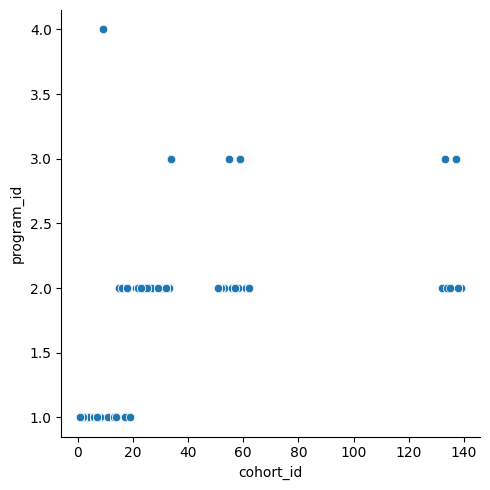

In [1209]:
sns.relplot(data=df, x="cohort_id", y= "program_id")

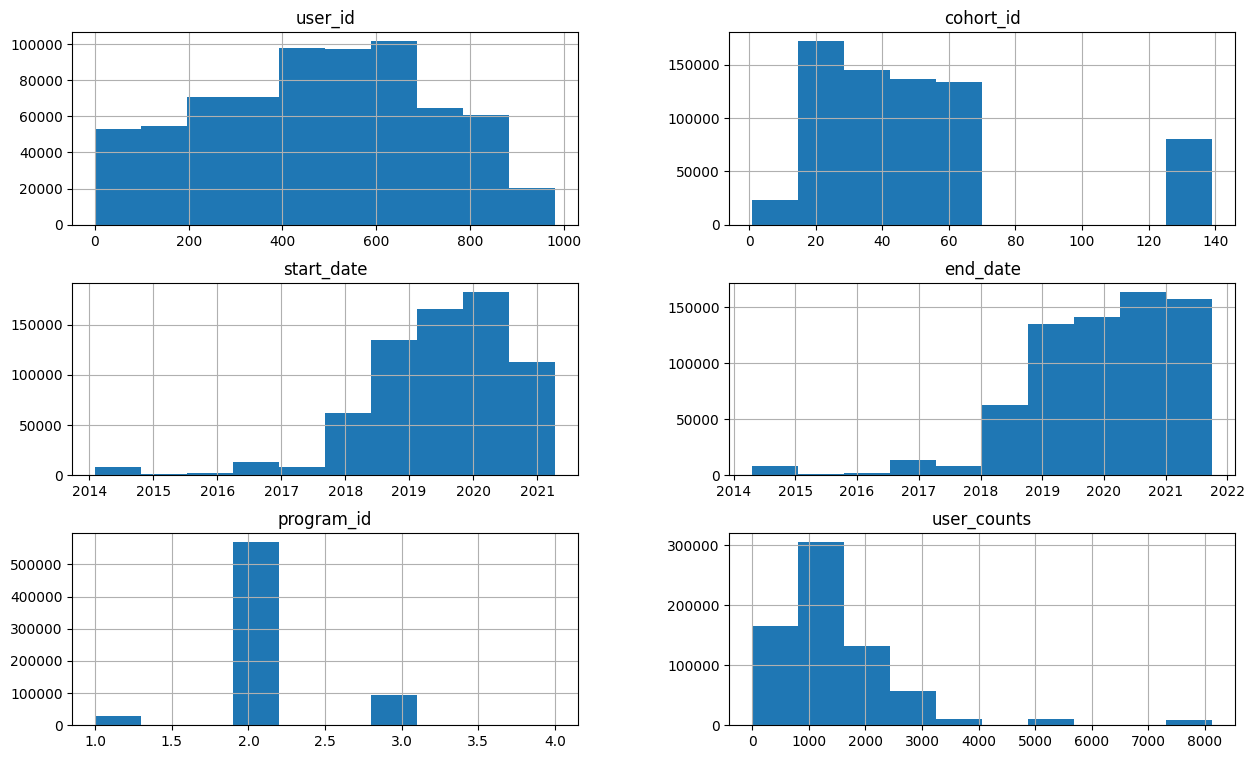

In [1210]:
df.hist(figsize= (15,9))
plt.show()

----

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [1211]:
df.path.value_counts() 
# TOC is table of Contents, so we'll drop that really quickly from path too. You'd expect to see it and the search/seartch_index.json a lot so they can find where they're going. We'll drop that one too.

javascript-i                  16386
html-css                      11843
java-iii                      11773
java-ii                       10917
spring                        10480
                              ...  
About_NLP                         1
8.0_Intro_Module                  1
introduction-to-matplotlib        1
2.0_Intro_Stats                   1
interview                         1
Name: path, Length: 1841, dtype: int64

In [1212]:
df.groupby(["cohort_id"]).count()

,path,user_id,ip,name,start_date,end_date,program_id,user_counts
cohort_id,,,,,,,,
1,8153,8153,8153,8153,8153,8153,8153,8153
2,74,74,74,74,74,74,74,74
4,3,3,3,3,3,3,3,3
6,68,68,68,68,68,68,68,68
7,530,530,530,530,530,530,530,530
8,1488,1488,1488,1488,1488,1488,1488,1488
9,4,4,4,4,4,4,4,4
11,227,227,227,227,227,227,227,227
12,291,291,291,291,291,291,291,291


In [1213]:
df.cohort_id.nunique()

45

In [1214]:
for x in df.cohort_id.unique():
    print(f'''Cohort : {x}, Path and Count : {df[df.cohort_id == x].path.value_counts().head(1)}''')


Cohort : 8, Path and Count : java-iii    57
Name: path, dtype: int64
Cohort : 22, Path and Count : spring    744
Name: path, dtype: int64
Cohort : 21, Path and Count : spring    364
Name: path, dtype: int64
Cohort : 1, Path and Count : javascript-i    294
Name: path, dtype: int64
Cohort : 16, Path and Count : spring    65
Name: path, dtype: int64
Cohort : 18, Path and Count : javascript-i    69
Name: path, dtype: int64
Cohort : 19, Path and Count : content/laravel/intro    38
Name: path, dtype: int64
Cohort : 13, Path and Count : index.html    84
Name: path, dtype: int64
Cohort : 14, Path and Count : index.html    877
Name: path, dtype: int64
Cohort : 15, Path and Count : java-i    19
Name: path, dtype: int64
Cohort : 7, Path and Count : content/html-css    29
Name: path, dtype: int64
Cohort : 4, Path and Count : mkdocs/search_index.json    1
Name: path, dtype: int64
Cohort : 12, Path and Count : content/html-css    19
Name: path, dtype: int64
Cohort : 17, Path and Count : javascript-i

##### Going through the individual Cohorts, there's a few other lessons that top some classes, but Javascript I tops the charts the most.

----


2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


Referencing above, Cohort 56 (Apex), referenced the HTML-CSS lesson substantually more than other cohorts.
Looking at it, It's just... Apex didn't reference anymore more than HTML-CSS, while other cohorts browsed other things significantly more, but browsed HTML-CSS about the same or a smidge less than Apex.

In [1215]:
for x in df.cohort_id.unique():
    print(f'''Cohort : {x} HTML-CSS count:{df[(df.path == "html-css") & (df.cohort_id == x)].groupby('cohort_id').path.value_counts().max()}''' )

Cohort : 8 HTML-CSS count:21
Cohort : 22 HTML-CSS count:241
Cohort : 21 HTML-CSS count:168
Cohort : 1 HTML-CSS count:215
Cohort : 16 HTML-CSS count:6
Cohort : 18 HTML-CSS count:56
Cohort : 19 HTML-CSS count:12
Cohort : 13 HTML-CSS count:10
Cohort : 14 HTML-CSS count:174
Cohort : 15 HTML-CSS count:3
Cohort : 7 HTML-CSS count:21
Cohort : 4 HTML-CSS count:nan
Cohort : 12 HTML-CSS count:5
Cohort : 17 HTML-CSS count:69
Cohort : 23 HTML-CSS count:562
Cohort : 2 HTML-CSS count:2
Cohort : 9 HTML-CSS count:nan
Cohort : 11 HTML-CSS count:12
Cohort : 24 HTML-CSS count:528
Cohort : 25 HTML-CSS count:411
Cohort : 26 HTML-CSS count:597
Cohort : 6 HTML-CSS count:1
Cohort : 27 HTML-CSS count:384
Cohort : 29 HTML-CSS count:675
Cohort : 31 HTML-CSS count:375
Cohort : 32 HTML-CSS count:457
Cohort : 33 HTML-CSS count:766
Cohort : 34 HTML-CSS count:16
Cohort : 51 HTML-CSS count:773
Cohort : 52 HTML-CSS count:353
Cohort : 53 HTML-CSS count:585
Cohort : 55 HTML-CSS count:nan
Cohort : 56 HTML-CSS count:738
Co

In [1216]:
df[df.cohort_id == 56].name.head(1)

datetime
2020-02-24 15:28:10    Apex
Name: name, dtype: object

In [1217]:
for x in df.cohort_id.unique():
    print(f'''Cohort : {x} | {df[(df.path == "java-i") & (df.cohort_id == x)].groupby('cohort_id').path.value_counts().max()}''' )

Cohort : 8 | 46
Cohort : 22 | 522
Cohort : 21 | 126
Cohort : 1 | 132
Cohort : 16 | 18
Cohort : 18 | 54
Cohort : 19 | 14
Cohort : 13 | 20
Cohort : 14 | 138
Cohort : 15 | 19
Cohort : 7 | 8
Cohort : 4 | nan
Cohort : 12 | 1
Cohort : 17 | 76
Cohort : 23 | 377
Cohort : 2 | 1
Cohort : 9 | nan
Cohort : 11 | 5
Cohort : 24 | 641
Cohort : 25 | 406
Cohort : 26 | 484
Cohort : 6 | 3
Cohort : 27 | 249
Cohort : 29 | 605
Cohort : 31 | 338
Cohort : 32 | 482
Cohort : 33 | 526
Cohort : 34 | 7
Cohort : 51 | 460
Cohort : 52 | 326
Cohort : 53 | 555
Cohort : 55 | nan
Cohort : 56 | 590
Cohort : 57 | 515
Cohort : 58 | 489
Cohort : 59 | nan
Cohort : 61 | 213
Cohort : 62 | 503
Cohort : 132 | 408
Cohort : 134 | 172
Cohort : 133 | nan
Cohort : 135 | 62
Cohort : 137 | nan
Cohort : 138 | 17
Cohort : 139 | 4


----

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


In [1218]:
df[df.user_id == 2].count().max()

1473

In [1219]:
for x in df.user_id.unique():
    print(f"{x} : {df[df.user_id == x].ip.value_counts().sum()}")

1 : 1401
2 : 1473
3 : 1503
4 : 638
5 : 1611
6 : 1303
7 : 1636
8 : 453
9 : 559
10 : 776
11 : 2472
12 : 798
13 : 91
14 : 588
16 : 193
15 : 252
17 : 174
18 : 1447
19 : 1397
20 : 2022
21 : 107
22 : 194
23 : 923
24 : 24
25 : 1663
26 : 435
27 : 429
28 : 231
30 : 1385
31 : 949
32 : 644
33 : 134
34 : 498
35 : 435
37 : 133
29 : 792
38 : 355
36 : 210
39 : 937
40 : 488
41 : 1086
42 : 170
43 : 683
45 : 62
46 : 51
47 : 181
49 : 22
51 : 536
52 : 215
53 : 8126
55 : 88
44 : 910
56 : 163
57 : 173
60 : 452
64 : 3541
65 : 94
68 : 1349
69 : 65
70 : 63
71 : 4
72 : 503
75 : 82
76 : 84
77 : 9
50 : 146
80 : 505
81 : 2
82 : 5
83 : 182
84 : 7
85 : 3
87 : 46
90 : 260
91 : 10
93 : 160
94 : 48
95 : 7
96 : 201
97 : 2
98 : 84
99 : 752
101 : 220
102 : 79
104 : 7
105 : 268
106 : 95
107 : 7
108 : 12
109 : 33
67 : 211
110 : 500
112 : 29
113 : 95
114 : 17
115 : 5
117 : 401
116 : 1103
119 : 935
120 : 2596
121 : 778
123 : 1226
124 : 1098
122 : 551
126 : 328
127 : 2356
118 : 1456
125 : 111
130 : 369
129 : 181
128 : 1236
131

In [1220]:
# for x in df.user_id.unique():
#     df['counts'] = 0
#     df['counts'][df.user_id == x] = df[df.user_id == x].count().max()

#### MOVING THIS UP IT CONFLICTS WITH MY INDEX

# counts = pd.DataFrame(df.groupby('user_id').size(), columns=['user_counts']).reset_index()
# df = df.merge(counts, how="left", on="user_id")

In [1221]:
df.head()

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473


In [1222]:
df[df.user_counts == 1].user_id.unique(), df[df.user_counts == 1].user_id.nunique()

(array([165, 212, 348, 593, 857]), 5)

We have 33 students with under 10 accesses on file, 18 with less than 5 accesses, and 5 with only 1 access!
- We'll look into the students with only one access.


In [1223]:
df[df.user_counts == 1]

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-03-30 21:37:04,index.html,165,24.243.3.200,16,Niagara,2016-10-26,2017-03-09,2,1
2018-06-19 09:21:08,students/units/75/sub_units/268,212,170.248.173.247,1,Arches,2014-02-04,2014-04-22,1,1
2019-01-27 19:02:17,content/php_iii/php-with-html/sessions-with-ph...,348,172.58.111.203,7,Glacier,2015-06-05,2015-10-06,1,1
2020-02-17 11:45:21,index.html,593,167.24.104.150,14,Lassen,2016-07-18,2016-11-10,1,1
2021-01-13 11:19:19,html-css,857,69.232.101.106,53,Fortuna,2020-01-13,2020-06-23,2,1


- All of them are from different cohorts, at different times.

For 3 of them, it's pretty routine, they accessed it on the first day of their program, they honestly probably dropped out after the first class (like one of our students).
> BUT! 212 and 348 accessed weird paths [(students/units/75/sub_units/268) and (content/php_iii/php-with-html/sessions-with-php) respectively] on the same day, at the exact same time, both well after their cohort end date. (IP is different.)

----

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


In [1224]:
df.head()

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:24,javascript-i/conditionals,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473
2018-01-26 09:56:41,javascript-i/loops,2,97.105.19.61,22,Teddy,2018-01-08,2018-05-17,2,1473


In [1225]:
pages = df['path'].resample('d').count()

In [1226]:
pages.head()

datetime
2018-01-26    489
2018-01-27    202
2018-01-28    143
2018-01-29    715
2018-01-30    586
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='datetime'>

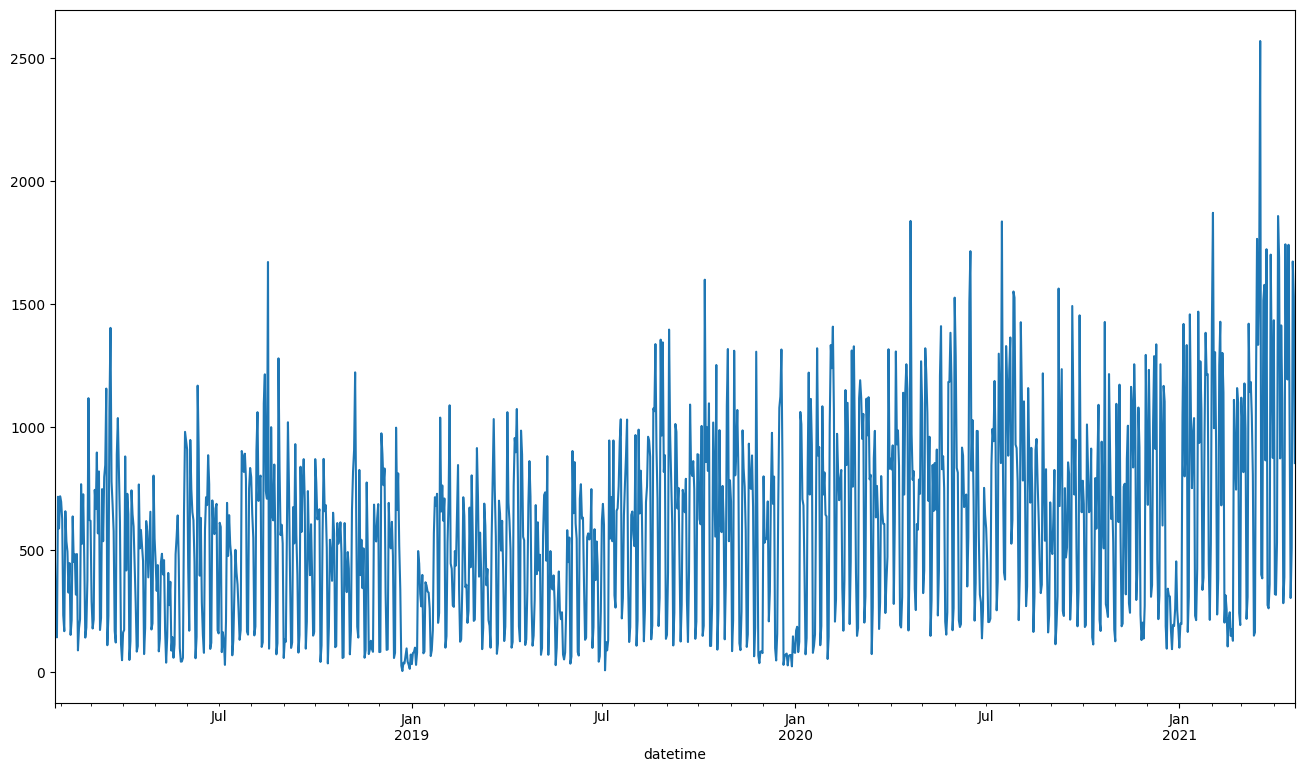

In [1227]:
pages.plot(figsize= (16,9))

In [1228]:
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

datetime
2018-01-26    489.000000
2018-01-27    325.000000
2018-01-28    246.297297
2018-01-29    417.708571
2018-01-30    472.871959
Freq: D, Name: path, dtype: float64

In [1229]:
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

datetime
2018-01-26    489.000000
2018-01-27    335.250000
2018-01-28    261.809847
2018-01-29    400.453499
2018-01-30    448.862297
Freq: D, Name: path, dtype: float64

In [1230]:
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

datetime
2018-01-26    489.000000
2018-01-27    340.716667
2018-01-28    270.370233
2018-01-29    392.881937
2018-01-30    436.820972
Freq: D, Name: path, dtype: float64

In [1231]:
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

datetime
2018-01-26    489.000000
2018-01-27    343.905556
2018-01-28    275.443397
2018-01-29    389.022348
2018-01-30    430.188025
Freq: D, Name: path, dtype: float64

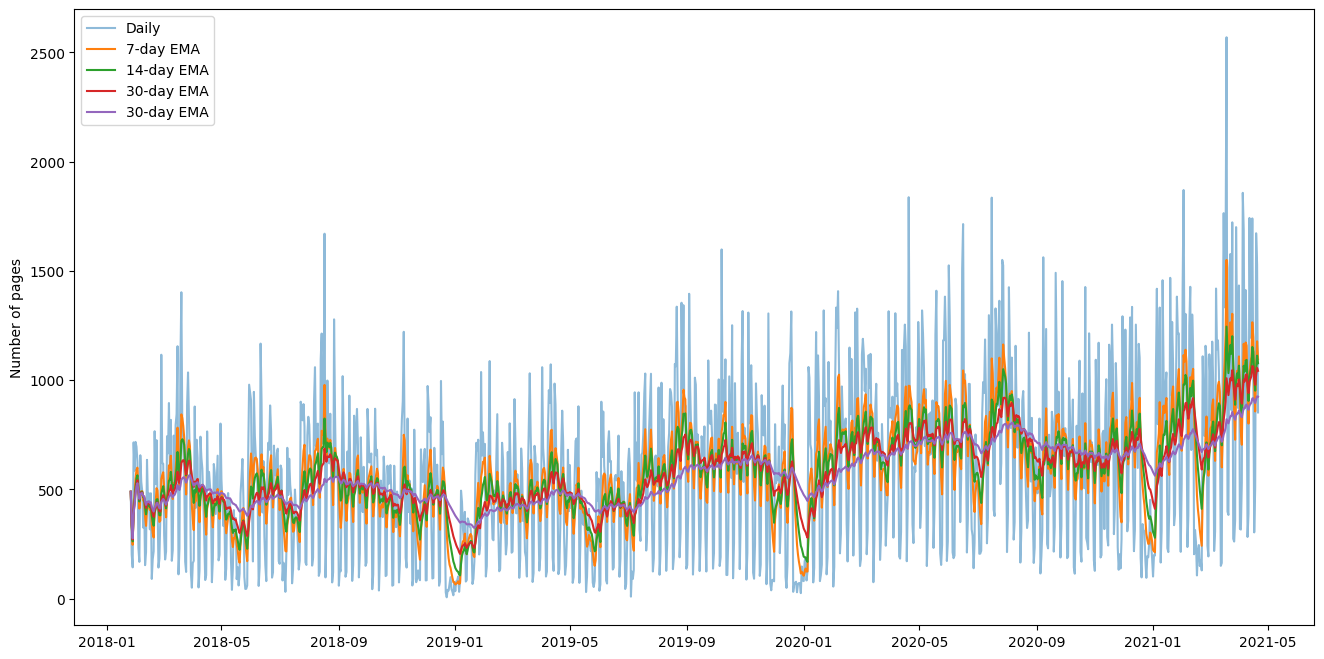

In [1232]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [1233]:
# Bollinger Bands
midband = pages.ewm(span=30).mean()
stdev = pages.ewm(span=30).std()
ub = midband + stdev*3
lb = midband - stdev*3
ub, lb

(datetime
 2018-01-26            NaN
 2018-01-27     949.535605
 2018-01-28     818.359774
 2018-01-29    1210.125356
 2018-01-30    1183.657591
                  ...     
 2021-04-17    2741.116985
 2021-04-18    2693.937109
 2021-04-19    2762.010307
 2021-04-20    2779.862199
 2021-04-21    2717.148610
 Freq: D, Name: path, Length: 1182, dtype: float64,
 datetime
 2018-01-26           NaN
 2018-01-27   -268.102272
 2018-01-28   -277.619308
 2018-01-29   -424.361483
 2018-01-30   -310.015648
                  ...    
 2021-04-17   -719.650941
 2021-04-18   -737.468874
 2021-04-19   -716.023894
 2021-04-20   -668.584586
 2021-04-21   -632.146972
 Freq: D, Name: path, Length: 1182, dtype: float64)

In [1234]:
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
datetime,,
2018-01-26,NaN,NaN
2018-01-27,949.535605,-268.102272
2018-01-28,818.359774,-277.619308
2018-01-29,1210.125356,-424.361483
2018-01-30,1183.657591,-310.015648


In [1235]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
datetime,,,,
2018-01-26,489,489.000000,NaN,NaN
2018-01-27,202,340.716667,949.535605,-268.102272
2018-01-28,143,270.370233,818.359774,-277.619308
2018-01-29,715,392.881937,1210.125356,-424.361483
2018-01-30,586,436.820972,1183.657591,-310.015648


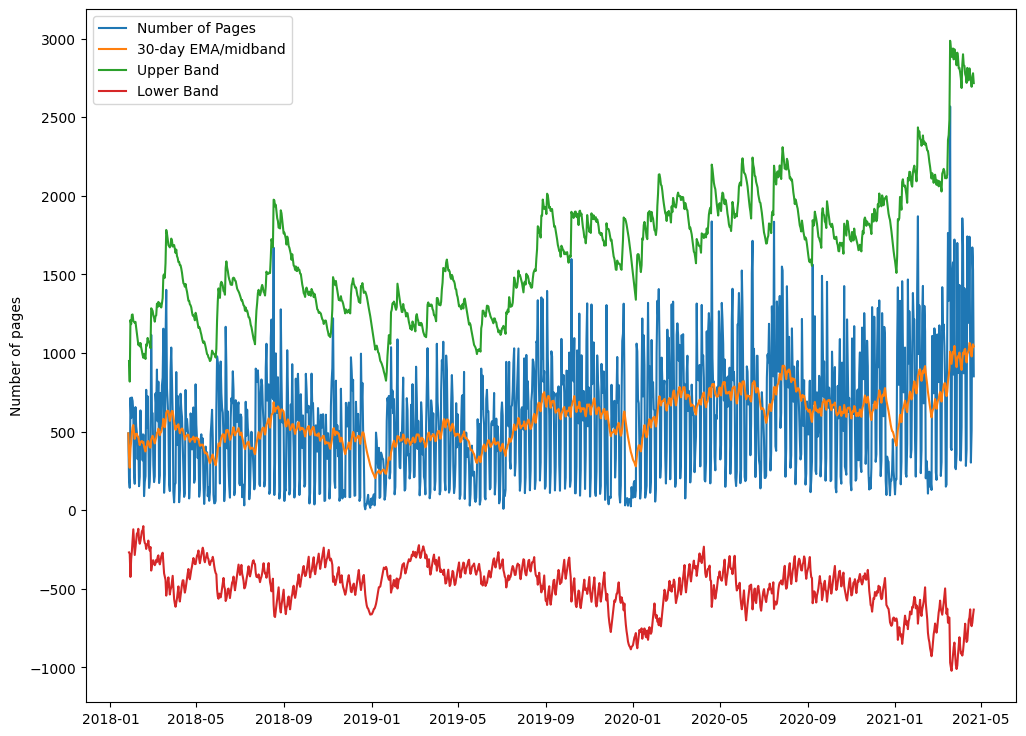

In [1270]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [1237]:
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()

,pages,midband,ub,lb,pct_b
datetime,,,,,
2018-01-26,489,489.000000,NaN,NaN,NaN
2018-01-27,202,340.716667,949.535605,-268.102272,0.386077
2018-01-28,143,270.370233,818.359774,-277.619308,0.383784
2018-01-29,715,392.881937,1210.125356,-424.361483,0.697076
2018-01-30,586,436.820972,1183.657591,-310.015648,0.599874


In [1238]:
my_df[my_df['pct_b']>1]

,pages,midband,ub,lb,pct_b
datetime,,,,,


In [1239]:
def prep(df, user):
    df = df[df.user_id == user]
 #   df.date = pd.to_datetime(df.date)
#    df = df.set_index(df.date)
    pages = df['path'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [1240]:
user = 1
span = 30
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)

In [1241]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [1242]:
print(f'''Anomality Counts:
{anomalies.pages.value_counts(sort="desc")}''')

Anomality Counts:
2      67
3      59
4      51
7      47
5      42
       ..
269     1
95      1
104     1
72      1
66      1
Name: pages, Length: 94, dtype: int64


In [1243]:
anomalies[anomalies.pages == 2].user_id.value_counts().head()

189    3
75     2
76     2
126    2
201    2
Name: user_id, dtype: int64

In [1244]:
df[df.user_id == 189]

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-05-30 09:06:42,html-css,189,97.105.19.61,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2018-05-30 09:06:48,html-css/introduction,189,97.105.19.61,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2018-05-30 09:06:55,html-css,189,97.105.19.61,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2018-05-30 09:07:36,html-css/introduction,189,97.105.19.61,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2018-05-30 10:50:46,appendix,189,97.105.19.61,24,Voyageurs,2018-05-29,2018-10-11,2,1457
...,...,...,...,...,...,...,...,...,...
2020-09-22 13:15:47,mysql,189,67.11.82.179,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2020-09-22 13:16:29,mysql/functions,189,67.11.82.179,24,Voyageurs,2018-05-29,2018-10-11,2,1457
2020-09-22 13:16:33,java-iii,189,67.11.82.179,24,Voyageurs,2018-05-29,2018-10-11,2,1457


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [1245]:
before = df[df.index < "2019"]
after = df[df.index >= "2019"]
after.head()

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,73.31.215.224,26,Xanadu,2018-09-17,2019-02-08,2,584
2019-01-01 12:56:12,java-i,274,67.11.239.2,26,Xanadu,2018-09-17,2019-02-08,2,1921
2019-01-01 12:59:46,java-i/strings,274,67.11.239.2,26,Xanadu,2018-09-17,2019-02-08,2,1921
2019-01-01 15:25:49,java-i/methods,274,67.11.239.2,26,Xanadu,2018-09-17,2019-02-08,2,1921
2019-01-01 15:32:26,javascript-ii,301,72.181.106.116,27,Yosemite,2018-11-05,2019-04-03,2,338


In [1246]:
# From what we've seen so far program_id 1 or 2  is Web Dev : 3 is definitely Data Science
# That's odd, there's only one user in 4, and it's very early in our access. Also they've only accessed some html/css
df[df.program_id == 4]

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:47,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:52,content/html-css/introduction.html,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4


In [1247]:
df[df.user_id == 152]

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:47,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:52,content/html-css/introduction.html,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4


In [1248]:
df[df.name == "Apollo"]

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-03-22 19:01:54,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:01:54,content/html-css/gitbook/images/favicon.ico,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:47,content/html-css,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4
2018-03-22 19:02:52,content/html-css/introduction.html,152,207.68.209.17,9,Apollo,2015-03-30,2015-07-29,4,4


> (This Partially Answers 4)

>They're the only person in their Cohort, and only one in program ID 4. They're not staff and their start date is 2015-03-30 until 2015-07-29, but accessed at 2018-03-22.

>So something is up here.

In [1252]:
# Back to 5.
before.head(1)

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401


In [1253]:
after.head(1)

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,73.31.215.224,26,Xanadu,2018-09-17,2019-02-08,2,584


In [1260]:
lessons_accessed1 = pd.DataFrame(before[before.program_id == 1].path)
lessons_accessed1.head()

,path
datetime,
2018-01-26 09:56:02,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming
2018-01-26 10:14:51,javascript-i
2018-01-26 10:15:02,javascript-i/functions


In [1261]:
lessons_accessed3 = pd.DataFrame(before[before.program_id == 1].path)
lessons_accessed3.head()

,path
datetime,
2018-01-26 09:56:02,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming
2018-01-26 10:14:51,javascript-i
2018-01-26 10:15:02,javascript-i/functions


In [1267]:
print(f"Shared Accessed Lessons 2018 and earlier: {lessons_accessed1[lessons_accessed1.path == lessons_accessed3.path].path.nunique()}")

Shared Accessed Lessons 2018 and earlier: 577


In [1266]:
lessons_accessed1_a = pd.DataFrame(after[after.program_id == 1].path)
lessons_accessed1_a.head()

,path
datetime,
2019-01-02 02:55:30,content/html-css
2019-01-02 02:56:01,content/html-css/css-i
2019-01-02 02:56:29,content/html-css/css-i/introduction.html
2019-01-02 03:01:05,content/html-css/css-i/selectors-and-propertie...
2019-01-04 20:03:30,content/laravel/intro


In [1268]:
lessons_accessed3_a = pd.DataFrame(after[after.program_id == 1].path)
lessons_accessed3_a.head()

,path
datetime,
2019-01-02 02:55:30,content/html-css
2019-01-02 02:56:01,content/html-css/css-i
2019-01-02 02:56:29,content/html-css/css-i/introduction.html
2019-01-02 03:01:05,content/html-css/css-i/selectors-and-propertie...
2019-01-04 20:03:30,content/laravel/intro


In [1269]:
print(f"Shared Accessed Lessons 2018 and earlier: {lessons_accessed1[lessons_accessed1.path == lessons_accessed3.path].path.nunique()}")
print(f"Shared Accessed Lessons 2019 and later: {lessons_accessed1_a[lessons_accessed1_a.path == lessons_accessed3_a.path].path.nunique()}")

Shared Accessed Lessons 2018 and earlier: 577
Shared Accessed Lessons 2019 and later: 552


In [ ]:
# There's still a lot of shared access, let me look further into 2019:
before = df[df.index < "2019"]
after = df[df.index >= "2019"]
after.head()

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [1274]:
access_after = df[df.index > df.end_date]
access_after

,path,user_id,ip,cohort_id,name,start_date,end_date,program_id,user_counts
datetime,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 09:56:06,slides/object_oriented_programming,1,97.105.19.61,8,Hampton,2015-09-22,2016-02-06,1,1401
2018-01-26 10:14:51,javascript-i,11,97.105.19.61,1,Arches,2014-02-04,2014-04-22,1,2472
2018-01-26 10:15:02,javascript-i/functions,11,97.105.19.61,1,Arches,2014-02-04,2014-04-22,1,2472
...,...,...,...,...,...,...,...,...,...
2021-04-21 15:20:12,classification/classical_programming_vs_machin...,692,96.8.130.134,59,Darden,2020-07-13,2021-01-12,3,1951
2021-04-21 15:20:12,classification/scale_features_or_not.svg,692,96.8.130.134,59,Darden,2020-07-13,2021-01-12,3,1951
2021-04-21 15:20:14,classification/project,692,96.8.130.134,59,Darden,2020-07-13,2021-01-12,3,1951


In [1276]:
access_after[access_after.program_id == 1].path.value_counts()

index.html                                  1011
javascript-i                                 736
html-css                                     542
spring                                       501
java-iii                                     479
                                            ... 
2.02.00_Inferential_Stats                      1
content/appendix/postwork/sales-tax.html       1
Exercises                                      1
8.1_Overview                                   1
ajax-api-request.html                          1
Name: path, Length: 707, dtype: int64

In [1277]:
access_after[access_after.program_id == 2].path.value_counts()

javascript-i                    2416
spring                          2368
html-css                        1861
java-i                          1831
java-ii                         1730
                                ... 
6.02.01_Prep                       1
6.01.03_Summarize                  1
uploads/598dc43df39e2.jpg          1
6.01.02_Acquirecsv                 1
mysql/clauses/limit-order-by       1
Name: path, Length: 817, dtype: int64

In [1278]:
access_after[access_after.program_id == 3].path.value_counts()

sql/mysql-overview                                275
classification/overview                           267
classification/scale_features_or_not.svg          220
anomaly-detection/AnomalyDetectionCartoon.jpeg    193
anomaly-detection/overview                        191
                                                 ... 
11-nlp/pos-tagging                                  1
11-nlp/topic-modeling                               1
git                                                 1
python/handling-duplicate-values                    1
individual-project/individual-project               1
Name: path, Length: 435, dtype: int64

7. Which lessons are least accessed? 


8. Anything else I should be aware of?

--------
Side Assets

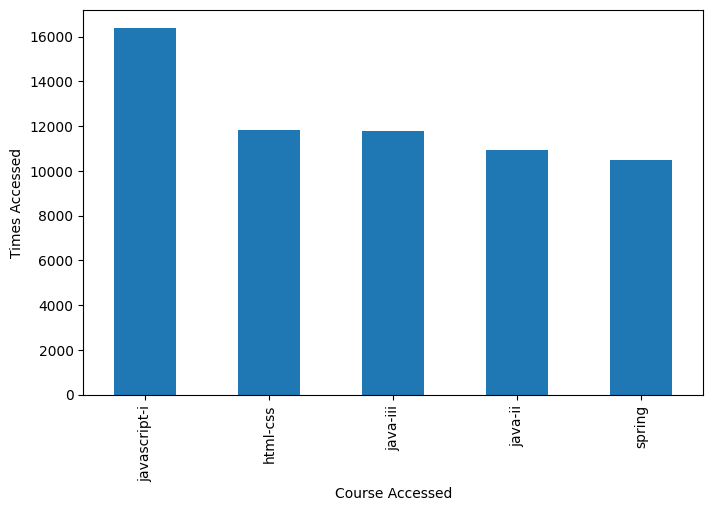

In [1249]:
df.path.value_counts().head().plot(figsize= (8,5),kind= 'bar',rot=90)
plt.xlabel("Course Accessed")
plt.ylabel("Times Accessed")
plt.show()